In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pylab as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import scikitplot as skplt

## Dataset information

The HTRU2 dataset compiles 1,638 true known pulsars including 16,259 additional candidate. These compiled data sets displays eight features. The additional candidates will be identified to be RFI/noise.

## Browsing the Dataset

In [5]:
data = pd.read_csv('HTRU_2.csv')
feature_names = data.columns.values[0:-1]

In [6]:
data.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Metadata

1. Integrated Profile
    1. mean_int_pf = mean
    2. std_pf = standard deviation
    3. ex_kurt_pf = kurtosis
    4. skew_pf = skewness

2. DM-SNR Curve
    1. mean_dm = mean
    2. std_dm = standard deviation
    3. kurt_dm = kurtosis
    4. skew_dm = skewness

In [7]:
features = data.drop('class', axis=1)
targets = data['class']

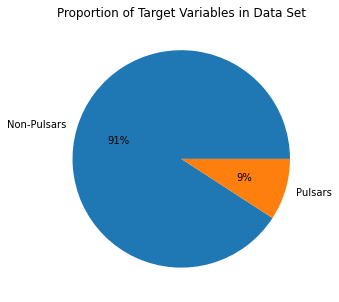

In [9]:
plt.figure(figsize=(5,5))
plt.pie(targets.value_counts().values, labels=['Non-Pulsars', 'Pulsars'], autopct='%1.0f%%')
plt.title('Proportion of Target Variables in Data Set')
plt.show()

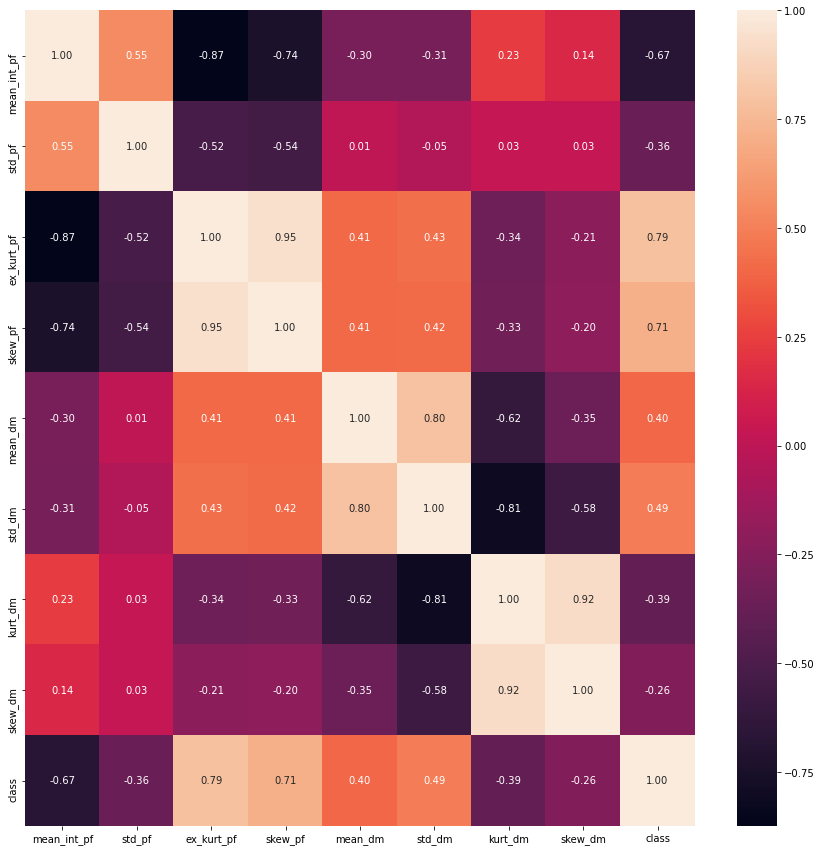

In [10]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linecolor='blue', fmt='.2f', ax=ax)
plt.show()

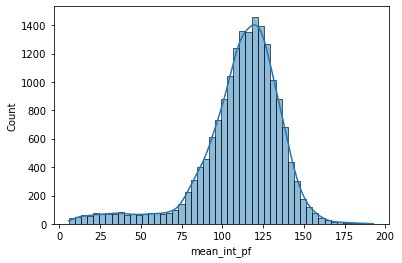

In [24]:
# looking at the distribution of values for each column in rhe dataset.

data_num = data.select_dtypes([float, int])

sns.histplot(data=data, x=data['mean_int_pf'], bins=50, kde=True)
plt.show()

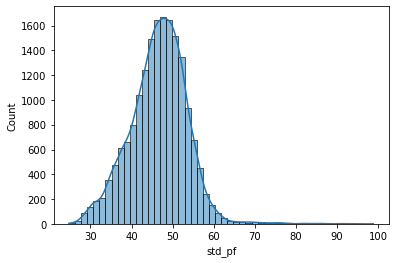

In [25]:
sns.histplot(data=data, x=data['std_pf'], bins=50, kde=True)
plt.show()

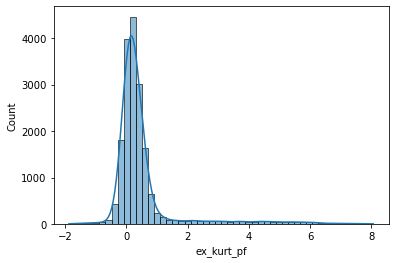

In [26]:
sns.histplot(data=data, x=data['ex_kurt_pf'], bins=50, kde=True)
plt.show()

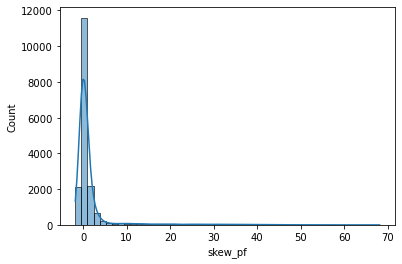

In [27]:
sns.histplot(data=data, x=data['skew_pf'], bins=50, kde=True)
plt.show()

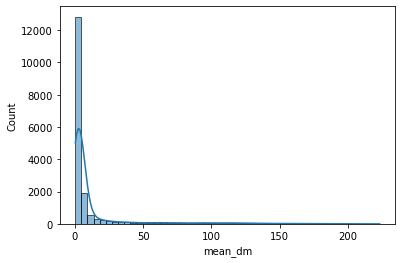

In [32]:
sns.histplot(data=data, x=data['mean_dm'], bins=50, kde=True)
plt.show()

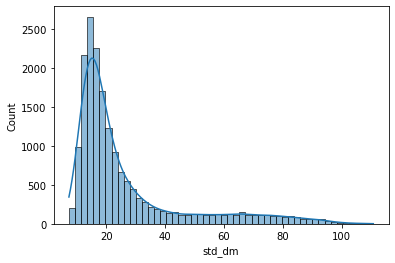

In [33]:
sns.histplot(data=data, x=data['std_dm'], bins=50, kde=True)
plt.show()

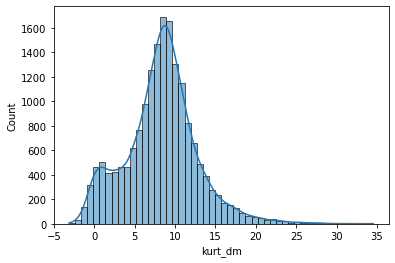

In [34]:
sns.histplot(data=data, x=data['kurt_dm'], bins=50, kde=True)
plt.show()

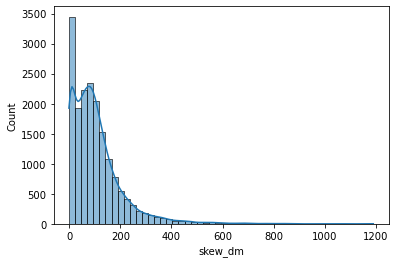

In [35]:
sns.histplot(data=data, x=data['skew_dm'], bins=50, kde=True)
plt.show()

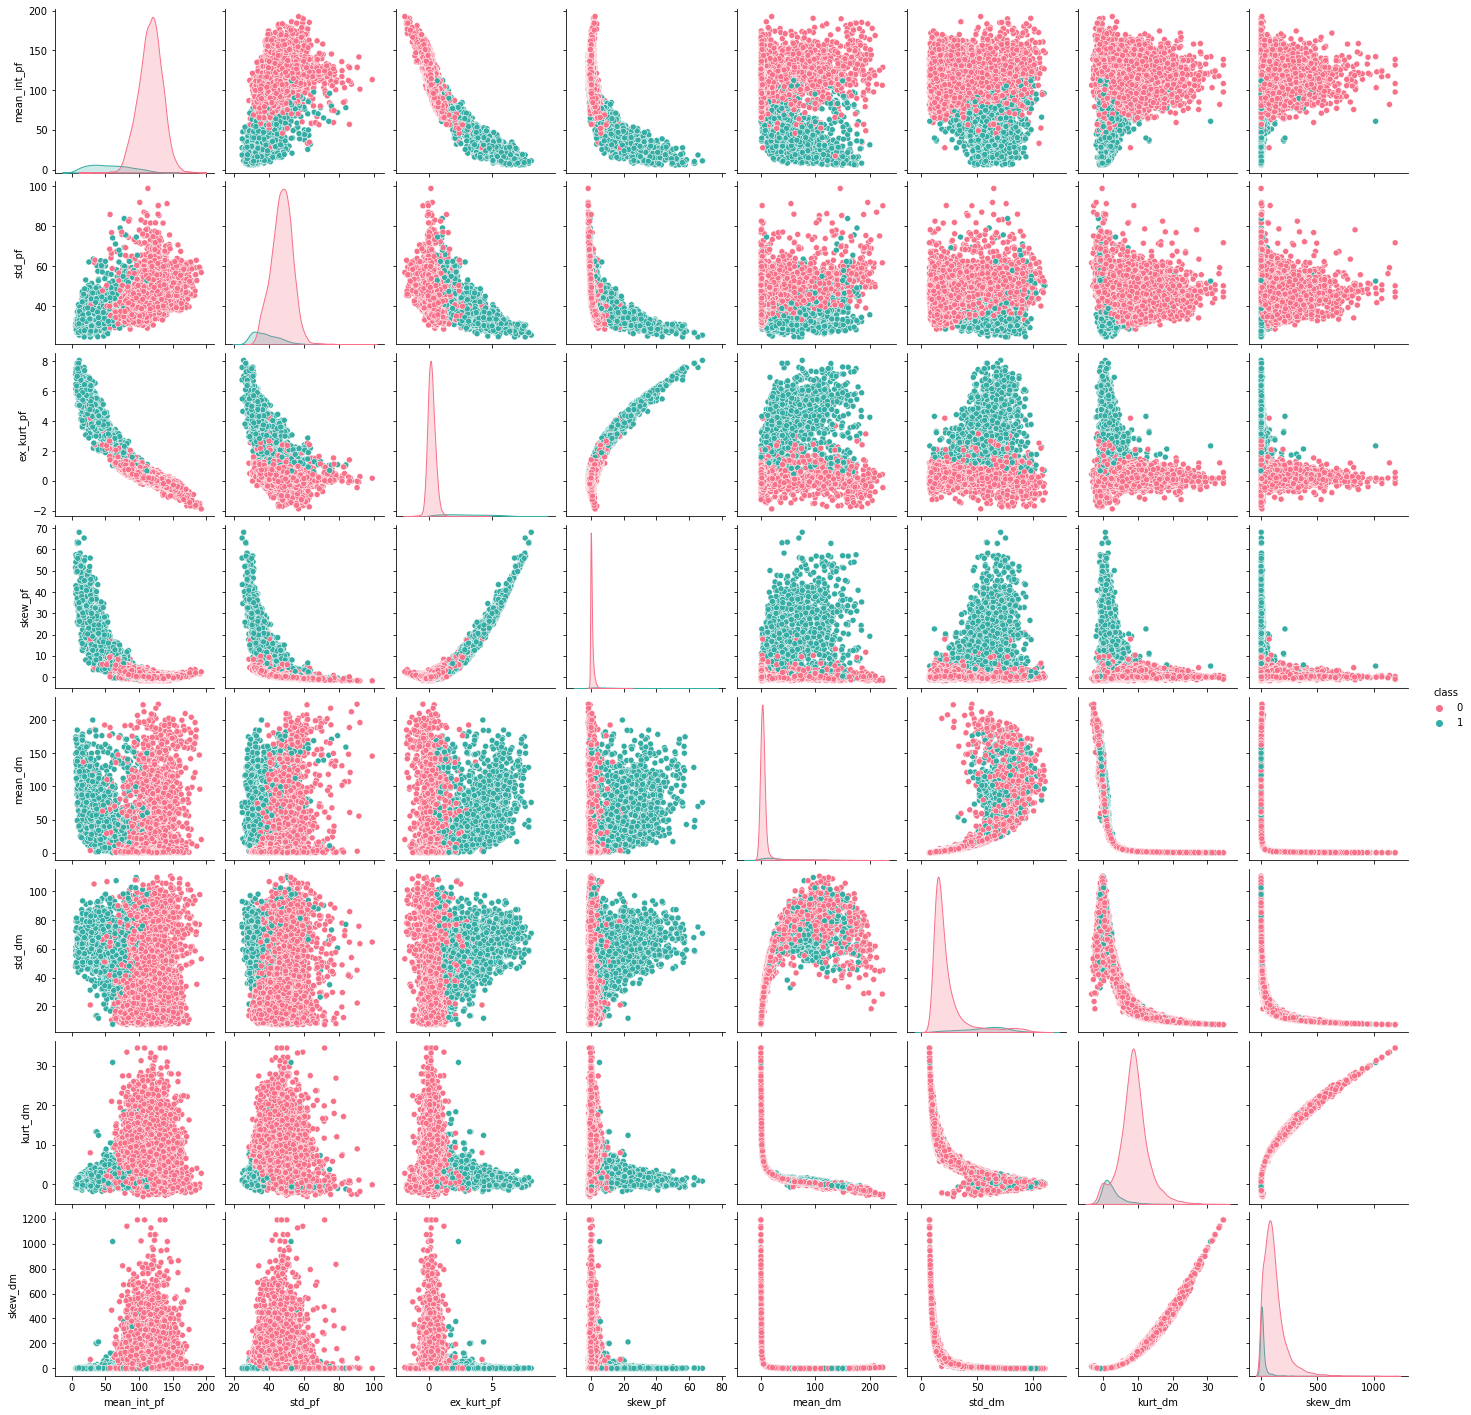

In [36]:
g = sns.pairplot(data, hue='class', palette='husl', diag_kind='kde', kind='scatter')

In [37]:
# Spliting into train and test groups

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.33, random_state=66)

In [38]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(X_train, Y_train)
knn_prediction = knn.predict(X_test)

In [39]:
# Random Forest Classifier

RFC = RandomForestClassifier(n_jobs=2, n_estimators=10)
RFC.fit(X_train, Y_train)
rfc_predict = RFC.predict(X_test)

In [40]:
# Implementing 10-fold cross validation

rfc_cv_score = cross_val_score(RFC, features, targets, cv=2)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

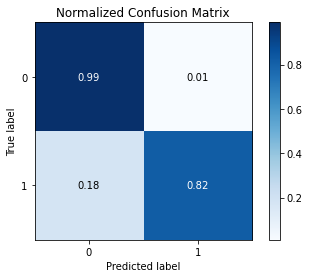

In [41]:
# Visualizing Confusion Matrix

predictions = cross_val_predict(RFC, features, targets, cv=2)
skplt.metrics.plot_confusion_matrix(targets, predictions, normalize=True)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

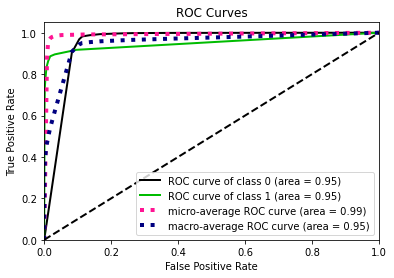

In [42]:
probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

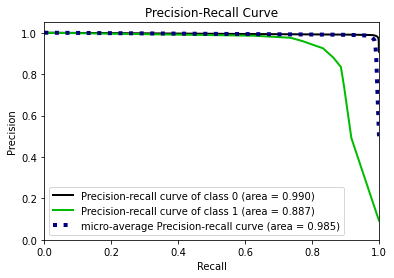

In [43]:
skplt.metrics.plot_precision_recall(Y_test, probas)

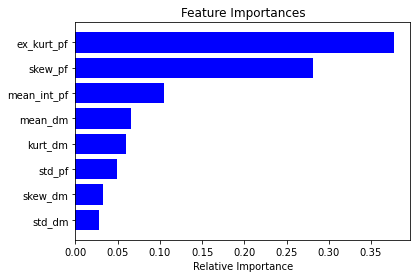

In [45]:
# Feature Ranking

importances = RFC.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')

plt.show()